<a href="https://colab.research.google.com/github/Haidarly2/PCVK_Semester_5/blob/main/Pertemuan_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Praktikum Jobsheet 6 - Histogram, Histogram Equalization, Dithering**

## **1. Import drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **2. Import Library**

In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

## **3. Histogram Citra**

### **A. Histogram tanpa library Numpy histogram**

In [3]:
# Membaca citra grayscale
image = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')

# Memastikan citra berhasil dibaca
if image is None:
    print("Error: Citra tidak ditemukan!")
    exit()

# Pisahkan channel R, G, dan B
b, g, r = cv.split(image)

# Hitung histogram untuk masing-masing channel
hist_r = cv.calcHist([r], [0], None, [256], [0, 256])
hist_g = cv.calcHist([g], [0], None, [256], [0, 256])
hist_b = cv.calcHist([b], [0], None, [256], [0, 256])

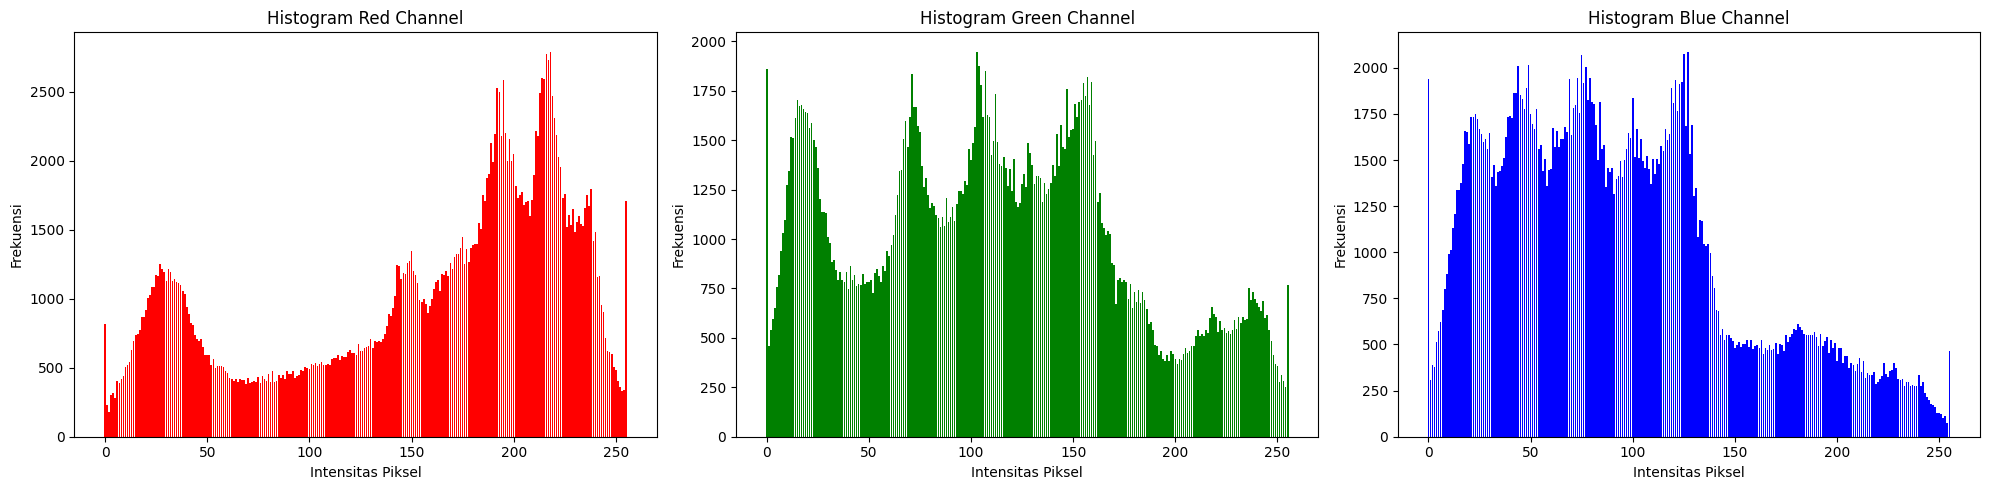

In [4]:
# Tampilkan histogram di subplot terpisah
plt.figure(figsize=(20, 5))

# Histogram Red Channel
plt.subplot(1, 3, 1)
plt.bar(np.arange(256), hist_r[:, 0], color='red', width=0.8)  # Lebar bar diatur menjadi 1
plt.xlim([-15, 270])
plt.title('Histogram Red Channel')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Frekuensi')

# Histogram Green Channel
plt.subplot(1, 3, 2)
plt.bar(np.arange(256), hist_g[:, 0], color='green', width=0.8)
plt.xlim([-15, 270])
plt.title('Histogram Green Channel')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Frekuensi')

# Histogram Blue Channel
plt.subplot(1, 3, 3)
plt.bar(np.arange(256), hist_b[:, 0], color='blue', width=0.8)
plt.xlim([-15, 270])
plt.title('Histogram Blue Channel')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Frekuensi')

# Tampilkan semua histogram
plt.tight_layout()
plt.show()

### **B. Histogram dengan menggunakan library Numpy Histogram**

In [5]:
# Membaca citra grayscale
image = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')

# Memastikan citra berhasil dibaca
if image is None:
    print("Error: Citra tidak ditemukan!")
    exit()

# Memisahkan channel R, G, B
red_channel = image[:, :, 2]
green_channel = image[:, :, 1]
blue_channel = image[:, :, 0]

# Menggunakan np.histogram untuk menghitung histogram
hist_r, bins_r = np.histogram(red_channel, bins=256, range=(0, 256))
hist_g, bins_g = np.histogram(green_channel, bins=256, range=(0, 256))
hist_b, bins_b = np.histogram(blue_channel, bins=256, range=(0, 256))

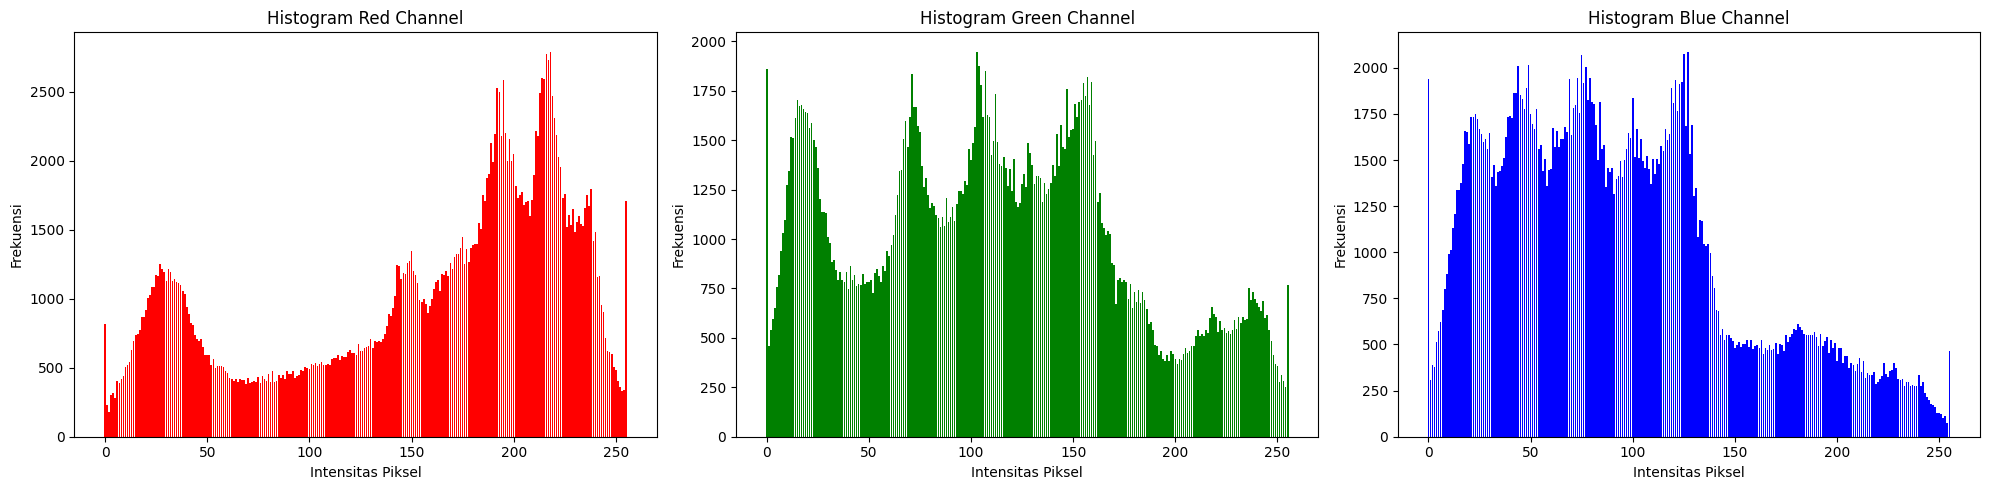

In [6]:
# Tampilkan histogram di subplot terpisah
plt.figure(figsize=(20, 5))

# Histogram Red Channel
plt.subplot(1, 3, 1)
plt.bar(bins_r[:-1], hist_r, color='red', width=0.8)
plt.xlim([-15, 270])  # Tambahkan jarak sebelum 0 dan setelah 255
plt.title('Histogram Red Channel')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Frekuensi')

# Histogram Green Channel
plt.subplot(1, 3, 2)
plt.bar(bins_g[:-1], hist_g, color='green', width=0.8)
plt.xlim([-15, 270])
plt.title('Histogram Green Channel')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Frekuensi')

# Histogram Blue Channel
plt.subplot(1, 3, 3)
plt.bar(bins_b[:-1], hist_b, color='blue', width=0.8)
plt.xlim([-15, 270])
plt.title('Histogram Blue Channel')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Frekuensi')

# Tampilkan semua histogram
plt.tight_layout()
plt.show()

## **4. Histogram Equalization**

### **A. Histogram Equalization tanpa library CV2 equalizeHist**

In [7]:
# Fungsi untuk menghitung histogram dari setiap channel gambar
def compute_histogram(image_channel):
    hist = np.zeros(256)
    for i in range(image_channel.shape[0]):
        for j in range(image_channel.shape[1]):
            hist[image_channel[i, j]] += 1
    return hist

# Fungsi untuk menghitung cumulative distribution function (CDF)
def compute_cdf(hist):
    cdf = np.cumsum(hist)
    cdf_normalized = cdf / cdf[-1]
    return cdf_normalized

# Fungsi untuk melakukan histogram equalization pada setiap channel
def histogram_equalization(image_channel):
    hist = compute_histogram(image_channel)
    cdf = compute_cdf(hist)
    cdf_normalized = np.floor(255 * cdf).astype(np.uint8)

    equalized_channel = np.zeros_like(image_channel)
    for i in range(image_channel.shape[0]):
        for j in range(image_channel.shape[1]):
            equalized_channel[i, j] = cdf_normalized[image_channel[i, j]]

    return equalized_channel

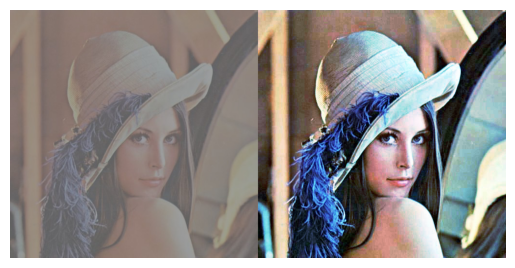

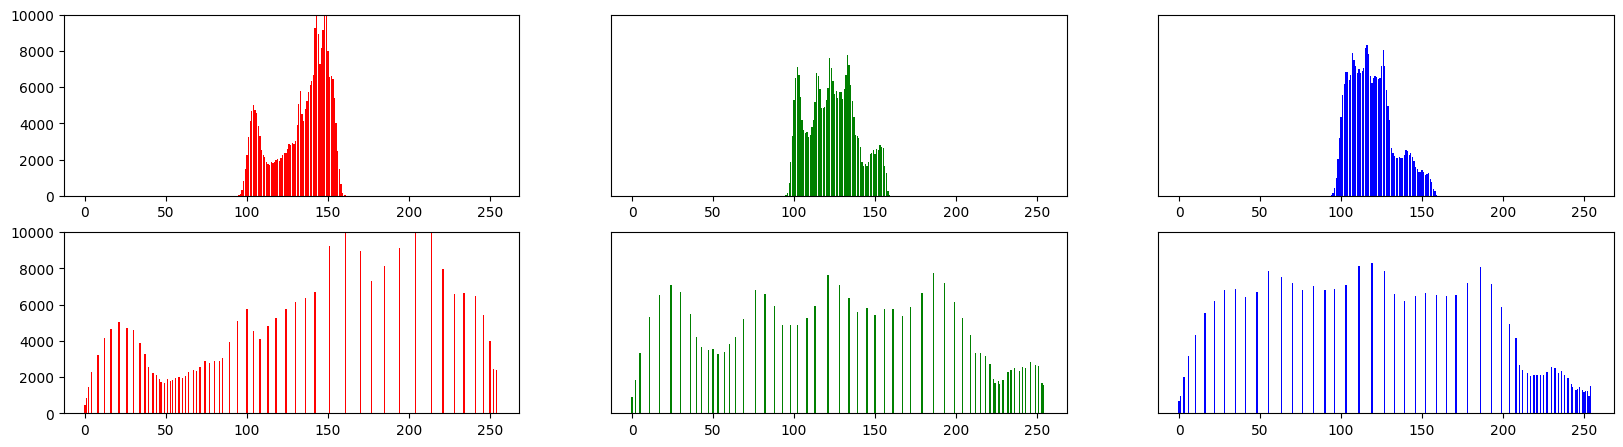

In [8]:
# Membaca gambar dengan skimage
lena_lc = io.imread('/content/drive/MyDrive/PCVK/Images/lena_lc.jpg')

# Memisahkan channel RGB
R = lena_lc[:, :, 0]
G = lena_lc[:, :, 1]
B = lena_lc[:, :, 2]

# Melakukan histogram equalization pada setiap channel
R_eq = histogram_equalization(R)
G_eq = histogram_equalization(G)
B_eq = histogram_equalization(B)

# Menggabungkan kembali channel setelah equalization
equalized_img = cv.merge((R_eq, G_eq, B_eq))

# Menampilkan gambar asli dan gambar yang sudah di-equalize
final_frame = cv.hconcat([lena_lc, equalized_img])
plt.imshow(final_frame)
plt.axis('off')
plt.show()

# Menampilkan histogram untuk gambar asli
hist_r = compute_histogram(R)
hist_g = compute_histogram(G)
hist_b = compute_histogram(B)

channels = [hist_r, hist_g, hist_b]
colors = ['r', 'g', 'b']

plt.figure(figsize=(20, 8))

# Histogram asli
for i, channel in enumerate(channels):
    plt.subplot(3, 3, i+1)
    plt.bar(range(256), channel, color=colors[i])
    plt.ylim([0, 10000])
    if i != 0:
        plt.yticks([])

# Histogram setelah equalization
for i, channel in enumerate([R_eq, G_eq, B_eq]):
    plt.subplot(3, 3, i+4)
    plt.bar(range(256), compute_histogram(channel), color=colors[i])
    plt.ylim([0, 10000])
    if i != 0:
        plt.yticks([])

plt.show()

### **B. Histogram Equalization dengan library CV2 equalizeHist**

In [9]:
# Fungsi untuk menghitung histogram dari setiap channel gambar
def compute_histogram(image_channel):
    hist = np.zeros(256)
    for i in range(image_channel.shape[0]):
        for j in range(image_channel.shape[1]):
            hist[image_channel[i, j]] += 1
    return hist

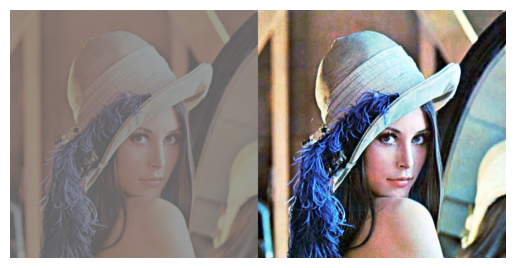

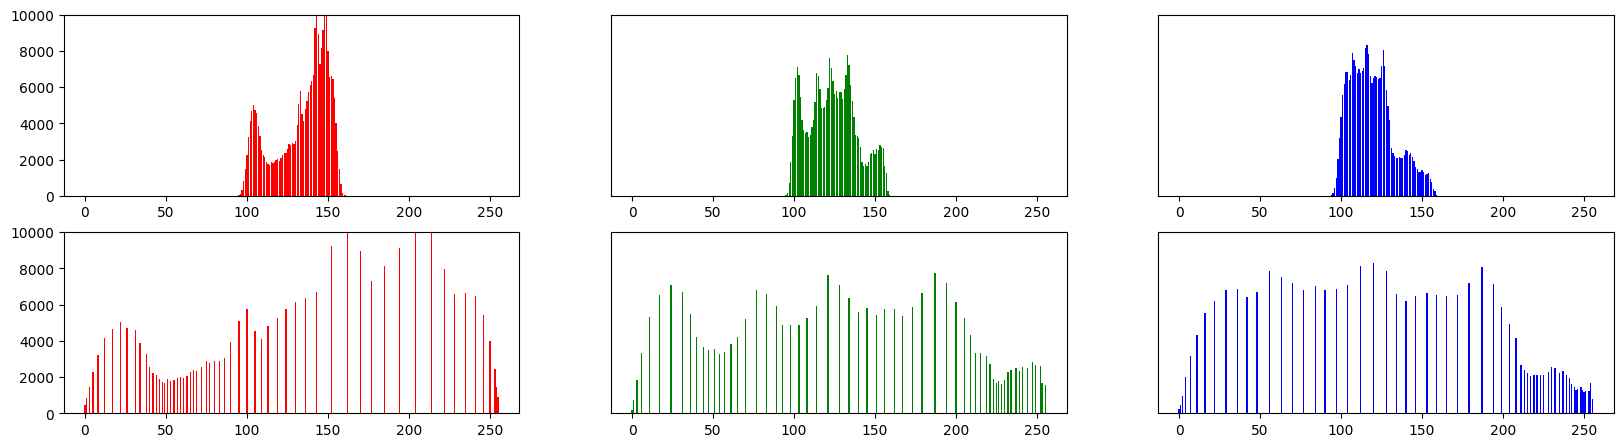

In [10]:
# Membaca gambar dengan skimage
lena_lc = io.imread('/content/drive/MyDrive/PCVK/Images/lena_lc.jpg')

# Memisahkan channel RGB
R = lena_lc[:, :, 0]
G = lena_lc[:, :, 1]
B = lena_lc[:, :, 2]

# Melakukan histogram equalization menggunakan OpenCV pada setiap channel
R_eq = cv.equalizeHist(R)
G_eq = cv.equalizeHist(G)
B_eq = cv.equalizeHist(B)

# Menggabungkan kembali channel setelah equalization
equalized_img = cv.merge((R_eq, G_eq, B_eq))

# Menampilkan gambar asli dan gambar yang sudah di-equalize
final_frame = cv.hconcat([lena_lc, equalized_img])
plt.imshow(final_frame)
plt.axis('off')
plt.show()

# Menampilkan histogram untuk gambar asli
hist_r = compute_histogram(R)
hist_g = compute_histogram(G)
hist_b = compute_histogram(B)

channels = [hist_r, hist_g, hist_b]
colors = ['r', 'g', 'b']

plt.figure(figsize=(20, 8))

# Histogram asli
for i, channel in enumerate(channels):
    plt.subplot(3, 3, i+1)
    plt.bar(range(256), channel, color=colors[i])
    plt.ylim([0, 10000])
    if i != 0:
        plt.yticks([])

# Histogram setelah equalization
for i, channel in enumerate([R_eq, G_eq, B_eq]):
    plt.subplot(3, 3, i+4)
    plt.bar(range(256), compute_histogram(channel), color=colors[i])
    plt.ylim([0, 10000])
    if i != 0:
        plt.yticks([])

plt.show()

## **5. Pemetaan 16 juta warna ke 8 warna**

In [11]:
# Fungsi untuk mencari warna dasar terdekat dari 8 warna
def closest_color(pixel):
    # Definisi warna dasar dalam bentuk array NumPy
    colors = np.array([
        [0, 0, 0],       # Hitam
        [0, 255, 0],     # Hijau
        [255, 255, 0],   # Kuning
        [0, 0, 255],     # Biru
        [0, 255, 255],   # Cyan
        [255, 0, 255],   # Magenta
        [255, 255, 255], # Putih
        [255, 0, 0]      # Merah
    ])

    # Hitung jarak Euclidean antara piksel dan warna dasar
    distances = np.sqrt(np.sum((colors - pixel) ** 2, axis=1))

    # Pilih warna dengan jarak terkecil
    return colors[np.argmin(distances)]

# Fungsi untuk memetakan gambar ke warna dasar terdekat
def map_colors(image):
    # Ukuran gambar
    height, width, _ = image.shape

    # Copy gambar untuk pemetaan warna
    mapped_image = np.zeros_like(image)

    # Vectorize proses per piksel menggunakan list comprehension
    for y in range(height):
        for x in range(width):
            mapped_image[y, x] = closest_color(image[y, x])

    return mapped_image

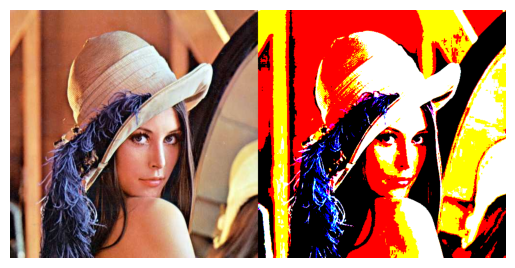

In [12]:
# Load gambar menggunakan OpenCV
image = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')  # Ganti dengan path ke gambar Anda
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)  # Konversi BGR ke RGB

# Panggil fungsi pemetaan warna
mapped_image = map_colors(image_rgb)

# Gabungkan gambar asli dan gambar hasil pemetaan untuk perbandingan
final_frame = np.hstack((image_rgb, mapped_image))

# Tampilkan gambar menggunakan Matplotlib
plt.imshow(final_frame)
plt.axis('off')  # Hilangkan axis
plt.show()

## **6. Dithering image using floyd - steinberg**

In [13]:
def apply_threshold(value):
    """Fungsi untuk menerapkan threshold pada nilai piksel."""
    return np.clip(value, 0, 255)

def floyd_steinberg_dithering(image):
    """Fungsi untuk menerapkan algoritma Floyd-Steinberg Dithering pada gambar RGB."""
    # Ambil ukuran gambar
    height, width, _ = image.shape

    # Buat salinan dari gambar asli untuk hasil dithering
    dithered_image = image.astype(np.float32)

    # Looping untuk setiap piksel pada gambar (menghindari batasan)
    for y in range(height):
        for x in range(width):
            # Ambil nilai piksel lama
            old_pixel = dithered_image[y, x].copy()  # Salin nilai pixel

            # Hitung piksel baru dengan pembulatan
            new_pixel = np.round(old_pixel / 255.0) * 255
            dithered_image[y, x] = new_pixel

            # Hitung error antara nilai piksel lama dan baru
            error = old_pixel - new_pixel

            # Sebarkan error ke piksel tetangga menggunakan koefisien Floyd-Steinberg
            if x + 1 < width:
                dithered_image[y, x + 1] += error * 7 / 16
            if y + 1 < height:
                if x - 1 >= 0:
                    dithered_image[y + 1, x - 1] += error * 3 / 16
                dithered_image[y + 1, x] += error * 5 / 16
                if x + 1 < width:
                    dithered_image[y + 1, x + 1] += error * 1 / 16

            # Terapkan threshold pada piksel baru
            dithered_image[y, x] = apply_threshold(dithered_image[y, x])

    # Kembalikan hasil dithering dalam bentuk uint8
    return dithered_image.astype(np.uint8)

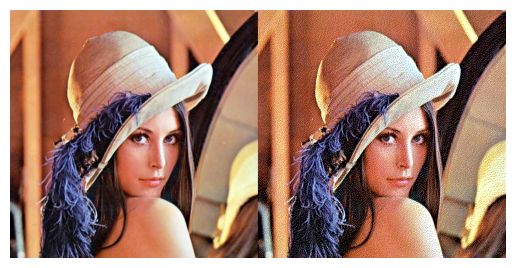

In [14]:
# Baca gambar dengan OpenCV (pastikan format warna benar)
original_image = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')

# Terapkan dithering
dithered_image = floyd_steinberg_dithering(original_image)

# Gabungkan gambar asli dan hasil dithering
final_image = cv.hconcat([original_image, dithered_image])

# Tampilkan hasil dengan konversi warna dari BGR ke RGB
plt.imshow(cv.cvtColor(final_image, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

## **7. Penerapan histogram, histogram equalization, dan image dithering**

In [15]:
# Fungsi untuk mengubah gambar menjadi grayscale menggunakan luminance
def grayscale_luminance(image):
    # Jika gambar adalah grayscale, tidak perlu diubah
    if len(image.shape) == 2:
        return image.astype(np.uint8)
    # Pastikan gambar memiliki 3 saluran
    elif image.shape[2] == 3:
        # Menghitung nilai grayscale menggunakan rumus luminance
        gray_image = np.dot(image[...,:3], [0.299, 0.587, 0.114])
        return gray_image.astype(np.uint8)
    else:
        raise ValueError("Input image must be a 2D grayscale or 3D RGB image.")

# Fungsi untuk menghitung histogram dari gambar grayscale
def compute_histogram(image_channel):
    hist = np.zeros(256)
    for value in image_channel.ravel():
        hist[value] += 1
    return hist

# Fungsi untuk menghitung cumulative distribution function
def compute_cdf(hist):
    cdf = np.cumsum(hist)
    cdf_normalized = cdf / cdf[-1]  # Normalisasi CDF
    return cdf_normalized

# Fungsi untuk melakukan histogram equalization
def histogram_equalization(image_channel):
    hist = compute_histogram(image_channel)
    cdf = compute_cdf(hist)
    cdf_normalized = np.floor(255 * cdf).astype(np.uint8)

    # Menerapkan transformasi pada gambar berdasarkan CDF
    equalized_channel = np.zeros_like(image_channel)
    for y in range(image_channel.shape[0]):
        for x in range(image_channel.shape[1]):
            equalized_channel[y, x] = cdf_normalized[image_channel[y, x]]

    return equalized_channel

# Fungsi untuk menerapkan algoritma Floyd-Steinberg Dithering
def threshold(value):
    return np.clip(value, 0, 255)

def floyd_steinberg_dithering(image):
    height, width = image.shape
    img_dithered = image.copy().astype(np.float32)

    for y in range(height - 1):
        for x in range(1, width - 1):
            pixel_old = img_dithered[y, x]
            pixel_new = np.round(pixel_old / 255) * 255
            img_dithered[y, x] = pixel_new
            error = pixel_old - pixel_new

            img_dithered[y, x + 1] += error * 7 / 16
            img_dithered[y + 1, x - 1] += error * 3 / 16
            img_dithered[y + 1, x] += error * 5 / 16
            img_dithered[y + 1, x + 1] += error * 1 / 16

            # Terapkan threshold pada tetangga setelah ditambah error
            img_dithered[y, x + 1] = threshold(img_dithered[y, x + 1])
            img_dithered[y + 1, x - 1] = threshold(img_dithered[y + 1, x - 1])
            img_dithered[y + 1, x] = threshold(img_dithered[y + 1, x])
            img_dithered[y + 1, x + 1] = threshold(img_dithered[y + 1, x + 1])

    return img_dithered.astype(np.uint8)

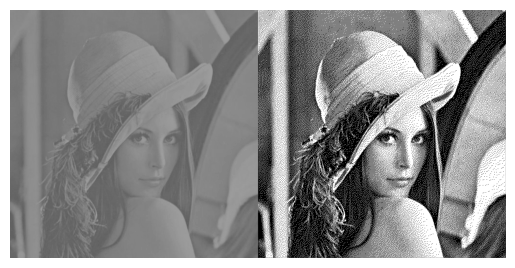

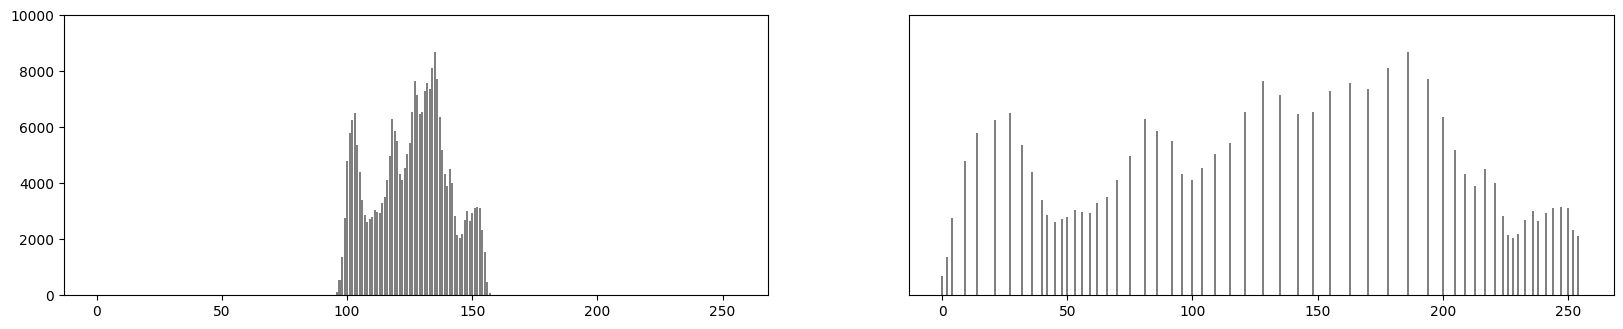

In [16]:
# Membaca gambar
lena_lc = io.imread('/content/drive/MyDrive/PCVK/Images/lena_lc.jpg')

# Mengubah ke grayscale
gray_image = grayscale_luminance(lena_lc)

# Terapkan histogram equalization
equalized_img = histogram_equalization(gray_image)

# Terapkan dithering Floyd-Steinberg
img_dithered = floyd_steinberg_dithering(equalized_img)

# Gabungkan gambar asli, hasil histogram equalization, dan hasil dithering
final_frame = cv.hconcat([gray_image, img_dithered])

# Tampilkan hasil
plt.imshow(final_frame, cmap='gray')
plt.axis('off')
plt.show()

# Menampilkan Histogram Grayscale
plt.figure(figsize=(20, 8))
images = np.array([gray_image, equalized_img])

for i, image in enumerate(images):
    plt.subplot(2, 2, i + 1)
    plt.bar(range(256), compute_histogram(image), color='gray')
    plt.ylim([0, 10000])
    if i != 0:
        plt.yticks([])

plt.show()